## HTTP Chapter 19: Inheritance

based on "How to Think Like a Computer Scientist in Python":

https://runestone.academy/runestone/books/published/thinkcspy/Inheritance/toctree.html

Summaries and this notebook by:

Eric V. Level  
Graduate Programs in Software  
University of St. Thomas, St. Paul, MN  


### 19.1 Pillars of OOP

Object-oriented programming involves four key ideas: encapsulation, information hiding, inheritance, and polymorphism. Encapsulation is the idea that a class can package some data together with the methods that manipulate the data. This is a powerful capability, and the chief idea that distinguishes OOP from structured programming. Information Hiding promotes quality code by allowing objects to protect their state against direct manipulation by code using the object. Python, like many languages, provides mechanisms to achieve information hiding, but we do not cover them in this book. Inheritance and polymorphism are mechanisms that help to enable code reuse and contract-based programming, and are the subject of this chapter.


Four key OOP concepts:
    
**Encapsulation**  
**Information Hiding**  
**Inheritance**  
**Polymorphism**  

***Encapsulation***: objects combine data with methods that manipulate the data

### 19.2 Introduction to Inheritance

Recall the `Point` class from earlier in the book:

In [1]:
# _19_2_1_pointclass_1.py

class Point:

    def __init__(self, initX, initY):
        self.x = initX
        self.y = initY

    def distanceFromOrigin(self):
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

    def __str__(self):
        return "x=" + str(self.x) + ", y=" + str(self.y)

p = Point(7, 6)
print(p)


x=7, y=6


Now, suppose we want to create a class that works like `Point` in every respect, but also keeps track of a short description for the point. We could create a `LabeledPoint` class by copying and pasting the definition for `Point`, changing the name to `LabeledPoint`, and modifying the class to suit our purposes. However, any time you copy and paste code, keep in mind that you are copying and pasting bugs that may exist in the code. Inheritance provides a way to reuse the definition of `Point` without having to copy and paste.

We begin like this:

In [2]:
# _19_2_2_labeledpoint.py

class LabeledPoint(Point):
    pass


This example defines a class named `LabeledPoint` that inherits from the `Point` class. Putting the name `Point` in parenthesis tells Python that the new class, `LabeledPoint`, begins with all of the methods defined in its parent, `Point`. For example, we can instantiate `LabeledPoint` using the `Point` constructor, and invoke any `Point` methds we want to on it:

```
p = LabeledPoint(7,6)  
dist = p.distanceFromOrigin()  
```

Now, let’s refine `LabeledPoint` so that it holds a label, along with the `x` and `y` coordinates:

In [3]:
# _19_2_3_labeledpoint_2.py

class LabeledPoint(Point):

    def __init__(self, initX, initY, label):
        self.x = initX
        self.y = initY
        self.label = label

    def __str__(self):
        return "x=" + str(self.x) + ", y=" + str(self.y) + " (" + self.label + ")"

labeledPt = LabeledPoint(7,6,"Here")
print(labeledPt)


x=7, y=6 (Here)


Here, we have redefined two of the methods that `LabeledPoint` inherits from `Point`: `__init__()` and `__str__()`. This is called ***overriding***. When a child class redefines methods that are defined in its parent, we say that the child overrides the functionality inherited from its parent. When both the parent class and child class have a method with the same name, an invocation of the method on an instance of the child class executes code in the child’s class; an invocation of the method on an instance of the parent class executes code in the parent’s class. For example, consider the following:

In [4]:
# _19_2_4_combinedpts.py

pt = Point(5,10)
print (pt)

labeledPt = LabeledPoint(7, 6, "Here")
print (labeledPt)

ptStr = str(pt)
print (ptStr)

labeledPtStr = str(labeledPt)
print(labeledPtStr)


x=5, y=10
x=7, y=6 (Here)
x=5, y=10
x=7, y=6 (Here)


In Line 4, the call to `str(pt)` invokes the `__str__()` method in `Point`, because `pt` refers to an instance of `Point`. In Line 5, the call to `str(labeledPt)` invokes the `__str__()` method in `LabeledPoint`, because `labeledPt` refers to an instance of `LabeledPoint`.

### 19.3 Extending

If you compare the code in the `__init__` methods of `Point` and `LabeledPoint`, you can see that there is some duplication–the initialization of `x` and `y`. We can eliminate the duplication by having `LabeledPoint`’s `__init__()` method invoke `Point`’s `__init__()` method. That way, each class will be responsible for initializing its own instance variables.

A method in a child class that overrides a method in the parent can invoke the overridden method using `super()`, like this:

```
 class LabeledPoint(Point):

     def __init__(self, initX, initY, label):

         super().__init__(initX, initY)

         self.label = label
```

In this example, line 4 invokes the `__init__()` method in `Point`, passing the values of `initX` and `initY` to be used in initializing the `x` and `y` instance variables.

Here is a complete code listing showing both classes, with a version of `__str__()` for `LabeledPoint` that invokes its parent’s implementation using `super()` to avoid duplicating the functionality provided in `Point`.

In [5]:
# _19_3_1_combined_pts_1.py

class Point:

    def __init__(self, initX, initY):
        self.x = initX
        self.y = initY

    def distanceFromOrigin(self):
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

    def __str__(self):
        return "x=" + str(self.x) + ", y=" + str(self.y)

class LabeledPoint(Point):

    def __init__(self, initX, initY, label):
        super().__init__(initX, initY)
        self.label = label

    def __str__(self):
        return super().__str__() + " (" + self.label + ")"

p = LabeledPoint(7,6,"Here")
print(p)
print(p.distanceFromOrigin())


x=7, y=6 (Here)
9.219544457292887


### 19.4 Reuse Through Composition

Inheritance is not the only way to reuse code. Composition occurs when an object stores a reference to one or more objects in one of its instance variables. The object is thus able to reuse code in the objects it embeds within itself.

For example, our `LabeledPoint` example could have been implemented as follows:

In [6]:
# _19_4_1_pt_composition_1.py

class Point:

    def __init__(self, initX, initY):
        self.x = initX
        self.y = initY

    def distanceFromOrigin(self):
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

    def __str__(self):
        return "x=" + str(self.x) + ", y=" + str(self.y)

class LabeledPoint:

    def __init__(self, initX, initY, label):
        self.point = Point(initX, initY)
        self.label = label

    def distanceFromOrigin(self):
        return self.point.distanceFromOrigin()

    def __str__(self):
        return str(self.point) + " (" + self.label + ")"

p = LabeledPoint(7,6,"Here")
print(p)
print(p.distanceFromOrigin())


x=7, y=6 (Here)
9.219544457292887


The first thing to notice about this version of `LabeledPoint` is that it does not inherit from `Point`. Instead, its constructor instantiates a `Point` and stores a reference to it in its point instance variable so that it can be used by the other methods.

Next, notice how the `distanceFromOrigin()` method reuses the code in `Point` by invoking it. We say that `LabeledPoint`’s `distanceFromOrigin()` delegates its implementation to `Point`’s implementation.

Finally, notice how the `__str__()` method also reuses the code in `Point` by calling `str(self.point)`.

### 19.5 Class Diagrams!

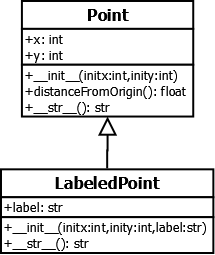

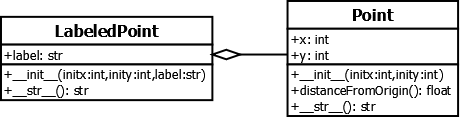

### 19.6 - Composition vs. Inheritance

Now you have seen two ways for a class to reuse code in another class. So, is one better than the other? When do you use inheritance, and when is composition the better choice?

Although the subject of this chapter is inheritance, the truth is that composition is usually a better choice than inheritance to reuse code. Perhaps 95% of cases where you are debating about choosing inheritance or composition, you should choose composition. It’s hard to go wrong with composition, but you can get into all kinds of trouble if you go with inheritance and inheritance is not an appropriate choice.

So, it’s easier to address the question of which technique to use by defining when inheritance is an appropriate choice. Inheritance is appropriate when the proposed child class (the one reusing the functionality in its parent) represents a specialization of its parent. Class A is a specialization of Class B if class A represents a specific type of class B. This is generally the case if you can fill in the following sentence with the names of the proposed child and parent classes:

**(child class) is a type of (parent class)**

Let’s try some examples. Using the `LabeledPoint` example from the previous section: “`LabeledPoint` is a type of `Point`.” Since a `LabeledPoint` is a specific type of `Point` – a `Point` that has a label – that sentence makes sense. `LabeledPoint` is a specialization of `Point`, and inheritance is an appropriate choice.

Now, suppose you wanted to define a class that represents a rectangle. Like a `Point`, a `Rectangle` would need to keep track of an `x` and `y` location to determine its position, and might also have a width and a height. You’re thinking about defining `Rectangle` to inherit from `Point`, so that it reuses all of `Point`’s functionality (like knowing its position and calculating its distance from origin), and adding just the two new instance variables it needs for its width and height. From a pure code reuse standpoint, inheritance seems plausible. But wait–let’s apply the “is-a” linguistic test. Filling in the blanks in the sentence template above, we get: “`Rectangle` is a type of `Point`.” Most people would feel there is something wrong with that statement. A rectangle is not a more specific type of a point. A rectangle contains points and consists of points, but is not itself a point. Thus, it fails the linguistic test; composition is the better choice here.

So what happens if you decide to ignore the linguistic test and go ahead and make `Rectangle` inherit from `Point`? In some cases, you won’t run into trouble right away. Often, the difficulties don’t start to crop up until later, when you decide to add more methods to `Point` (the parent) that aren’t appropriate for `Rectangle` (the child). This leads to a program that is confusing to understand and contains bugs that occur when methods intended for `Point` are invoked on `Rectangle` instances by mistake. Also, since inheritance is the strongest form of relationship between classes, changes to code in a parent class have a stronger likelihood of breaking code in its children than would tend to occur if composition were used.

Inheritance is a powerful feature and, when used appropriately, a terrific way to reuse code. But, like most power tools, it can cut you up pretty badly if you don’t know what you are doing. Use it with caution and respect.

### 19.7 - Case Study: Structured Postal Addresses

Postal addresses are interesting things. Every country has its own format for postal addresses, and sometimes one country can have multiple address formats.

Postal addresses generally consist of a few standard elements: the recipient name; street address; city or locality; state or province; and a postal code. However, other elements are often included, such as neighborhood, district, post office identifier, and so on. For example, the following is

    Mr. Abe Jones
    Acme Corporation
    123 Somewhere Ln
    Greenville, SC 29609
    USA

This same address would be written as follows for delivery to the Netherlands (in the example, the street, city, and state are unchanged, even though they do not exist in the Netherlands):

    Acme Corporation
    Mr. Abe Jones
    Somewhere Ln 123
    29609 SC Greenville
    NETHERLANDS

Addresses in Ireland are complex, having up to 12 parts (such as building name and number, primary and secondary thoroughfare, primary and secondary locality, town, county, …) plus an Eircode, a unique identifier assigned to each of the ~2 million addresses in Ireland. For example, Abe might live at the following address (English translation is given in parentheses, and would be omitted):

    Abe Jones
    Cnoc na Sceiche (The Hill of the Thorn)
    Leac an Anfa (The Flagstone of the Storm)
    Cathair na Mart (The City of the Beeves)
    Co. Mhaigh Eo (The County of the Plain of the Yews)
    A65 F4E2
    IRELAND

(One would think that since each address has its own unique Eircode, it ought to be possible to address mail to Abe Jones, A65 F4E2, IRELAND. On second thought, perhaps that is not such a great idea. Can you imagine the practical concerns with such a scheme?)

#### 19.7.1 - Storing Postal Addresses

Suppose we want to write a contact management application. Among other things, the application stores names and addresses. What would be the best way to design a class that holds the information for an address? One approach would be to store the parts of the address that are consistent, such as the recipient name and the country, in instance variables, and store the rest of the address as a list of address lines:

In [7]:
# _19_7_1_address_class_1.py

class Address:
    def __init__(self, recipient, addressLines, country):
        self.country = country
        self.recipient = recipient
        self.addressLines = addressLines


addr = Address('Abe Jones', ['123 Somewhere Ln', 'Greenville, SC  29609'], 'USA')
print(addr)


This approach treats an address as a collection of unstructured bits of information. If we want to look up an address, we can search by full name or country, but if we want to find all addresses in Greenville, or all addresses in zip code 29609, we can’t do it very easily, since information such as city and zip code is mashed together in an unstructured address line along with the state abbreviation.

An approach that stores addresses as structured pieces of information might look like this:

In [8]:
# _19_7_1_2_structured_addr_1

class StructuredAddress:
    def __init__(self, country, recipient, street, city, state, postalCode):
        self.country = country
        self.recipient = recipient
        self.street = street
        self.city = city
        self.state = state
        self.postalCode = postalCode

    def display(self):
        print(self.recipient)
        print(self.street)
        print(self.city + ", " + self.state + "  " + self.postalCode)
        print(self.country)

addr = StructuredAddress('USA', 'Abe Jones', '103 Anywhere Ln',
               'Greenville', 'SC', '29609')
addr.display()


Abe Jones
103 Anywhere Ln
Greenville, SC  29609
USA


Now, if we have a list of `StructuredAddress` objects and we want to find all of the ones that hold addresses in Greenville, we can do it much more easily:

`for addr in addrList:
    if addr.city == 'Greenville':
        addr.display()
`


#### 19.7.2 - Storing International Addresses

But now we have another problem. Our `StructuredAddress` works fine for U.S. addresses, but not for those of other countries. Suppose we want to handle Irish and Italian addresses. We might enhance the display() method to handle these with appropriate logic:

```
    def display(self):
        print(self.recipient)

        if self.country == 'USA':
            print(self.street)
            print(self.city + ", " + self.state + "  " + self.postalCode)
        elif self.country == 'IRELAND':
            print(self.postalCode)
        elif self.country == 'ITALY':
            print(self.street)
            print(self.postalCode + ' ' + self.city + ' ' + self.state)
        else:
            pass

        print(self.country)
```

This example works for Italian addresses because they conveniently have the same elements as U.S. addresses (just displayed in a slightly different order). For Irish addresses, we ignore the complicated address format and assume that the Irish post office will get mail to the recipient because of Ireland’s unique Eircode scheme. But what if we wanted to include the additional elements of Irish addresses? We might create additional instance variables for those elements in our `StructuredAddress` class. However, you can probably see that approach will quickly become unwieldy.

#### 19.7.3 - Inheritance Applied

Let’s apply inheritance to the problem of managing structured postal addresses. We will define a base class that contains the attributes in common to all postal addresses: recipient and country.

In [9]:
# _19_7_3_1_base_postal.py

class BasePostalAddress:
    def __init__(self, country, recipient):
        self.country = country
        self.recipient = recipient

    def display(self):
        print(self.recipient)
        print(self.country)

    def validate(self):
        return self.recipient != '' and self.country != ''


This class isn’t very useful by itself; relatively few people in the world could receive mail addressed to them using only their name and country. But it does establish two methods to perform functionality we want all addresses to perform: display themselves, and check whether the required information is present and of an appropriate length.

Next, we build on `BasePostalAddress` by creating a separate class for each country that inherits from it:

In [10]:
# _19_7_3_2_international_postal.py

class IrishPostalAddress(BasePostalAddress):
    def __init__(self, recipient, postalCode):
        super().__init__("IRELAND", recipient)
        self.postalCode = postalCode

    def display(self):
        print(self.recipient)
        print(self.postalCode)
        print(self.country)

    def validate(self):
        return super().validate() and len(self.postalCode) == 7

class USPostalAddress(BasePostalAddress):
    def __init__(self, recipient, street, city, state, zipcode):
        super().__init__("USA", recipient)
        self.street = street
        self.city = city
        self.state = state
        self.zip = zipcode

    def display(self):
        print(self.recipient)
        print(self.street)
        print(self.city + ", " + self.state + "  " + self.zip)
        print(self.country)

    def validate(self):
        return (super().validate() and self.city != '' and
            len(self.state) == 2 and
            (len(self.zip) == 5 or len(self.zip) == 9))
            # (len(self.postalCode) == 5 or len(self.postalCode) == 9)) # book's code has an error


In [11]:
test = USPostalAddress("me","47 main","shoreview","mn","5512")
test.validate()

False

#### 19.7.4 - A List of Addresses

Now, let’s construct a list containing both US and Irish addresses, and display them using a loop:

In [12]:
# _19_7_4_1_postal_list_ac.py

addrList = [IrishPostalAddress("Alf Jones", "A26F4G9"),
            USPostalAddress("Abe Jones", "103 Anywhere Ln",
                "Greenville", "SC", "29609"),
            IrishPostalAddress("Gabe Jones", "A65F4E2")]

for addr in addrList:
    addr.display()


Alf Jones
A26F4G9
IRELAND
Abe Jones
103 Anywhere Ln
Greenville, SC  29609
USA
Gabe Jones
A65F4E2
IRELAND


Normally, if a program iterates over a list that contains different types of objects, it has to be careful about making assumptions about the methods and operations that it can invoke on the different objects in the list, since an attempt to invoke a method or apply an operator to an object that does not support the method or operator will result in a runtime error. In this case, we know that all of the objects in the list inherit from `BasePostalAddress`. It is safe to invoke any methods defined in `BasePostalAddress`, since all children of `BasePostalAddress` are guaranteed to contain those methods. Programs that use inheritance often contain loops like this.

Notice something else. As the loop iterates over the list, each time the `display()` method is invoked, the computer will execute the one that is defined for the specific object referenced by addr. The first time through the loop, `addr` references an `IrishPostalAddress`, so the `display()` method for Irish addresses is invoked. The second time through the loop, the `display()` method in `USPostalAddress` is invoked. This behavior—where the computer always executes the method that is defined for the object being referenced—is called ***polymorphism***. Python exhibits this behavior whether or not the objects in question utilize inheritance, but languages like Java and C++, polymorphism is available only through inheritance.

#### 19.7.5 - Using ```isinstance()```

Let’s try something else with our list of addresses. Suppose we wanted to display all addresses with a given city. We might write some code like this:

```
for addr in addrList:
    if addr.city == 'Greenville':
        addr.display()
```
However, we would get into trouble on the first iteration of the loop. The first address is an Irish address, which does not have a city attribute. Python would raise an error. We want to perform this test only for US addresses.

In this case, since all addresses have a country attribute, we could write the loop this way:

```
for addr in addrList:
    if addr.country == 'USA' and addr.city == 'Greenville':
        addr.display()
```
Another way to test the address is to find out if the object belongs to a specific class. Python provides the `isinstance()` function for this purpose. `isinstance()` is designed for situations where you want to access a field or invoke a method on an object, but you want to do so only if the object provides the needed functionality. Given an object obj and a class cls, `isinstance(obj, cls)` returns `True` if `obj` is an instance of `cls` (or a subclass of `cls`), and `False` if it is not. Here is how we might use it in our loop:

```
for addr in addrList:
    if isinstance(addr, USPostalAddress) and addr.city == 'Greenville':
        addr.display()
```
In this version of the code, the `city` attribute will be tested only if `addr` references an instance of `USPostalAddress`, or a child of `USPostalAddress` (which would also have a `city` attribute).

Now that you’ve learned about `isinstance()`, you should know that, like inheritance itself, `isinstance()` should be used sparingly. Code that invokes `isinstance()` is often performing work on an object that the object should be designed to do itself, and is not utilizing inheritance and polymorphism to its full potential.

To make this loop better utilize inheritance and polymorphism, we need a way to test each address to see if it is in a given city. Let’s add a method to `BasePostalAddress` for this purpose. It will return a boolean indicating whether the address is in a certain city.

```
class BasePostalAddress:

    ...

    def isInCity(self, city):
        return False
```

`BasePostalAddresses` do not have a `city` attribute, so they just return `False`. `USPostalAddresses` do have a `city`, so we’ll override this method for that class:

```
class USPostalAddress:

    ...

    def isInCity(self, city):
        return self.city == city
```
Now, we rewrite our loop to use `isInCity()` to perform the test:

```
for addr in addrList:
    if addr.isInCity('Greenville'):
        addr.display()
```

Notice how we’ve eliminated the `isinstance()` test. Also, notice how this test works for `IrishPostalAddress` objects, even though we didn’t define `isInCity()` for `IrishPostalAddress`, since `IrishPostalAddress` inherits its version from `BasePostalAddress`.


### 19.8 – No Glossary!